# Fit

author: steeve laquitaine

Fit the standard Bayesian model to psychophysics circular estimates and use it make predictions.

## Setup

In [4]:
# go to the project's root path
import os
os.chdir("..")

In [10]:
# import dependencies
from bsfit.nodes.models.bayes import StandardBayes
from bsfit.nodes.dataEng import (
    simulate_dataset,
)
from bsfit.nodes.utils import (
    get_data, get_data_stats, get_prediction_stats
)
from bsfit.nodes.viz.prediction import plot_mean
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set parameters

In [11]:
# set the parameters
SUBJECT = "sub01"
PRIOR_SHAPE = "vonMisesPrior"
PRIOR_MODE = 225
OBJ_FUN = "maxLLH"
READOUT = "map"
PRIOR_NOISE = [80, 40]      # e.g., prior's std
STIM_NOISE = [0.33, 0.66, 1.0]
INIT_P = {
    "k_llh": [2.7, 10.7, 33],
    "k_prior": [2.7, 33],
    "k_card": [1],
    "prior_tail": [0],
    "p_rand": [0],
    "k_m": [2000],
}
CENTERING = True

## Simulate dataset

In [12]:
# simulate a training dataset
train_dataset = simulate_dataset(
    stim_noise=STIM_NOISE,
    prior_mode=PRIOR_MODE,
    prior_noise=PRIOR_NOISE,
    prior_shape=PRIOR_SHAPE,
)

# use the train dataset as test to show 
# best predictions
test_dataset = get_data(train_dataset)

## Train model and predict

In [13]:
# instantiate the model
model = StandardBayes(
    prior_shape=PRIOR_SHAPE, 
    prior_mode=PRIOR_MODE, 
    readout=READOUT
    )

# train the model
model = model.fit(dataset=train_dataset, init_p=INIT_P)

Training the model ...

-logl:50265.93, aic:100549.87, kl:[ 2.7 10.7 33. ], kp:[ 2.7 33. ], kc:[1.], pt:0.00, pr:0.00, km:2000.00
-logl:63349.73, aic:126717.45, kl:[ 2.835 10.7   33.   ], kp:[ 2.7 33. ], kc:[1.], pt:0.00, pr:0.00, km:2000.00
-logl:50284.86, aic:100587.73, kl:[ 2.7   11.235 33.   ], kp:[ 2.7 33. ], kc:[1.], pt:0.00, pr:0.00, km:2000.00
-logl:64023.04, aic:128064.09, kl:[ 2.7  10.7  34.65], kp:[ 2.7 33. ], kc:[1.], pt:0.00, pr:0.00, km:2000.00
-logl:67066.68, aic:134151.37, kl:[ 2.7 10.7 33. ], kp:[ 2.835 33.   ], kc:[1.], pt:0.00, pr:0.00, km:2000.00
-logl:69232.46, aic:138482.91, kl:[ 2.7 10.7 33. ], kp:[ 2.7  34.65], kc:[1.], pt:0.00, pr:0.00, km:2000.00
-logl:50265.93, aic:100549.87, kl:[ 2.7 10.7 33. ], kp:[ 2.7 33. ], kc:[1.05], pt:0.00, pr:0.00, km:2000.00
-logl:50265.93, aic:100549.87, kl:[ 2.7 10.7 33. ], kp:[ 2.7 33. ], kc:[1.], pt:0.00, pr:0.00, km:2000.00
-logl:3871.50, aic:7761.00, kl:[ 2.7 10.7 33. ], kp:[ 2.7 33. ], kc:[1.], pt:0.00, pr:0.00, km:2000.00
-l

In [14]:
# get predictions
output = model.predict(test_dataset, granularity="mean")
print("predictions data:", output.keys())

Calculating predictions ...

-logl:3871.50, aic:7761.00, kl:[ 2.7 10.7 33. ], kp:[ 2.7 33. ], kc:[1.], pt:0.00, pr:0.00, km:2000.00
predictions data: dict_keys(['PestimateGivenModel', 'map', 'conditions', 'prediction_mean', 'prediction_std'])


## Plot stats for data & predictions

We calculate the data and prediction mean and standard deviations.

In [15]:
# get data stats
estimate = test_dataset[1]
output = get_data_stats(estimate, output)

# get prediction stats
output = get_prediction_stats(output)

We plot the stats.

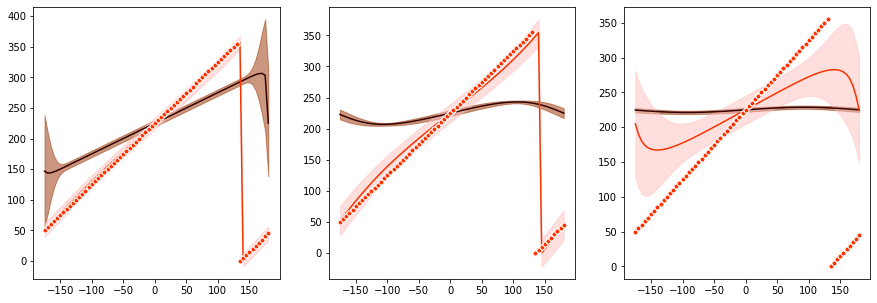

In [16]:
# plot
plt.figure(figsize=(15,5))
plot_mean(
    output["data_mean"],
    output["data_std"],
    output["prediction_mean"],
    output["prediction_std"],
    output["conditions"],
    prior_mode=PRIOR_MODE,
    centering=CENTERING,
)

Tutorial complete !